**Description**

The goal of this project was to EDA to thinking about While many parameters influence a car buyer, the decision always involves emotion. The first thing to consider before taking any decision is to have as much good quality data as possible. We have then to perform analysis and extract information's. In this EDA project , I'll study a public dataset available on KAGGLE. The dataset is scraped from Craiglist, a very popular classified ads in the US, and north America. It contains information's from around 450k car classified ads observation and 26 columns.

**Content:**

1. Missingno - Missing Data
2. Data Cleaning (drop columns , fill numerical with mean and categorical with mode)
3. Detect Outliers ,perform IQR (Box plot, Histogram)
4. Seaborn - Bar Plot
5. Matplotlib - Bar Plot
6. Seaborn - Heatmap

**Data Exploration**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Data Preparation**



Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn import preprocessing

Reading Data

In [6]:
# Reading data
df = pd.read_csv('vehicles.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [8]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [9]:
# show first 10 rowes
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [10]:
# random sample from data
df.sample(4)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
220872,7313051752,https://kirksville.craigslist.org/ctd/d/forsyt...,kirksville,https://kirksville.craigslist.org,32900,2011.0,ford,f-450 sd,excellent,10 cylinders,...,full-size,truck,white,https://images.craigslist.org/00303_kBP333O7YJ...,"2011 Ford F450 SD Crew Cab DRW 4WD - $32,900 ...",NaN,mo,36.695500,-93.115000,2021-04-26T16:40:54-0500
37081,7315177126,https://modesto.craigslist.org/cto/d/modesto-2...,modesto,https://modesto.craigslist.org,5000,2008.0,chrysler,pt cruiser touring,excellent,4 cylinders,...,compact,hatchback,blue,https://images.craigslist.org/00j0j_lGDoukEpmu...,2008 CHRYSLER PT CRUZER 108000 MILES RUNES AN...,NaN,ca,37.640900,-120.974900,2021-04-30T21:26:30-0700
240432,7316482835,https://raleigh.craigslist.org/cto/d/fuquay-va...,raleigh / durham / CH,https://raleigh.craigslist.org,58000,2014.0,ford,f250 super duty,excellent,8 cylinders,...,full-size,truck,white,https://images.craigslist.org/00303_a5FOcRPd4r...,"6"" 4 link lift with king coilovers, king shock...",NaN,nc,35.580000,-78.790800,2021-05-03T18:49:52-0400
409509,7316355699,https://seattle.craigslist.org/see/ctd/d/seatt...,seattle-tacoma,https://seattle.craigslist.org,9499,2013.0,dodge,grand caravan sxt,NaN,6 cylinders,...,NaN,van,white,https://images.craigslist.org/00Q0Q_kayTLbnLZt...,2013 Dodge Grand Caravan SXT VanExterior Color...,NaN,wa,47.745162,-122.344962,2021-05-03T12:01:00-0700


In [11]:
# statistic information 
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [12]:
print("The max and min respectively")
print(df['price'].max())
print(df['price'].min())

The max and min respectively
3736928711
0


In [13]:
# show columns
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [14]:
# show data types
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [15]:
# show number of rows and columns
df.shape

(426880, 26)

In [62]:
df['year'] = df.year.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418703 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        418703 non-null  object 
 1   region_url    418703 non-null  object 
 2   price         418703 non-null  int64  
 3   year          418703 non-null  object 
 4   manufacturer  401898 non-null  object 
 5   model         413770 non-null  object 
 6   condition     249860 non-null  object 
 7   cylinders     244940 non-null  object 
 8   fuel          415737 non-null  object 
 9   odometer      414381 non-null  float64
 10  title_status  410674 non-null  object 
 11  transmission  416214 non-null  object 
 12  drive         290031 non-null  object 
 13  type          327642 non-null  object 
 14  paint_color   290979 non-null  object 
 15  description   418633 non-null  object 
 16  state         418703 non-null  object 
 17  lat           412179 non-null  float64
 18  long

**Data Preprocessing**

**Clean Data**


There are some features that won't be relevant in our analysis, and contain alot of missing values.

In [63]:
drop_cols =['url','image_url', 'size', 'VIN','county','id']
df.drop(columns=drop_cols , axis=1, inplace=True)

df.head()

KeyError: "['url' 'image_url' 'size' 'VIN' 'county' 'id'] not found in axis"

Separate numerical and categorical feature.



In [18]:
category = ['manufacturer','cylinders','fuel','title_status','transmission','drive','type','paint_color','condition','year','posting_date'
           ,'state','description','model','region','region_url']
numerical = df.drop(category, axis=1)
categorical = df[category]
numerical.head()

,price,odometer,lat,long
0,6000,NaN,NaN,NaN
1,11900,NaN,NaN,NaN
2,21000,NaN,NaN,NaN
3,1500,NaN,NaN,NaN
4,4900,NaN,NaN,NaN


In [19]:
categorical.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,az,NaN,NaN,prescott,https://prescott.craigslist.org
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,ar,NaN,NaN,fayetteville,https://fayar.craigslist.org
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,fl,NaN,NaN,florida keys,https://keys.craigslist.org
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,ma,NaN,NaN,worcester / central MA,https://worcester.craigslist.org
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nc,NaN,NaN,greensboro,https://greensboro.craigslist.org


In [20]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   manufacturer  409234 non-null  object
 1   cylinders     249202 non-null  object
 2   fuel          423867 non-null  object
 3   title_status  418638 non-null  object
 4   transmission  424324 non-null  object
 5   drive         296313 non-null  object
 6   type          334022 non-null  object
 7   paint_color   296677 non-null  object
 8   condition     252776 non-null  object
 9   year          426880 non-null  object
 10  posting_date  426812 non-null  object
 11  state         426880 non-null  object
 12  description   426810 non-null  object
 13  model         421603 non-null  object
 14  region        426880 non-null  object
 15  region_url    426880 non-null  object
dtypes: object(16)
memory usage: 52.1+ MB


In [21]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     426880 non-null  int64  
 1   odometer  422480 non-null  float64
 2   lat       420331 non-null  float64
 3   long      420331 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 13.0 MB


In [22]:
#fill value in numerical with mean
for num in numerical:
    mean = numerical[num].mean()
    numerical[num]=numerical[num].fillna(mean) 

In [23]:
for i in  categorical:
    print(i)

manufacturer
cylinders
fuel
title_status
transmission
drive
type
paint_color
condition
year
posting_date
state
description
model
region
region_url


In [24]:
#detect numerical missing value
numerical.isnull().sum().sort_values(ascending=False) 

long        0
lat         0
odometer    0
price       0
dtype: int64

In [25]:
categorical.columns

Index(['manufacturer', 'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'condition', 'year', 'posting_date',
       'state', 'description', 'model', 'region', 'region_url'],
      dtype='object')

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# fill categorical with mode
for cat in categorical:
    mode = categorical[cat].mode().values[0]
    categorical[cat]=df[cat].fillna(mode)
    

In [28]:
#detect categorical missing value
categorical.isnull().sum().sort_values(ascending=False) 

region_url      0
region          0
model           0
description     0
state           0
posting_date    0
year            0
condition       0
paint_color     0
type            0
drive           0
transmission    0
title_status    0
fuel            0
cylinders       0
manufacturer    0
dtype: int64

In [29]:
categorical.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url
0,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,az,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,prescott,https://prescott.craigslist.org
1,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ar,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,fayetteville,https://fayar.craigslist.org
2,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,fl,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,florida keys,https://keys.craigslist.org
3,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ma,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,worcester / central MA,https://worcester.craigslist.org
4,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,nc,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,greensboro,https://greensboro.craigslist.org


In [30]:
numerical.head()

,price,odometer,lat,long
0,6000,98043.331443,38.49394,-94.748599
1,11900,98043.331443,38.49394,-94.748599
2,21000,98043.331443,38.49394,-94.748599
3,1500,98043.331443,38.49394,-94.748599
4,4900,98043.331443,38.49394,-94.748599


In [31]:
#concat table categorical and numerical to create new table without missing values
df2 = pd.concat([categorical,numerical],axis=1)
df2.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url,price,odometer,lat,long
0,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,az,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,prescott,https://prescott.craigslist.org,6000,98043.331443,38.49394,-94.748599
1,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ar,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,fayetteville,https://fayar.craigslist.org,11900,98043.331443,38.49394,-94.748599
2,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,fl,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,florida keys,https://keys.craigslist.org,21000,98043.331443,38.49394,-94.748599
3,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ma,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,worcester / central MA,https://worcester.craigslist.org,1500,98043.331443,38.49394,-94.748599
4,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,nc,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,greensboro,https://greensboro.craigslist.org,4900,98043.331443,38.49394,-94.748599


**Outlier Detection**



outlier detectionis the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data.



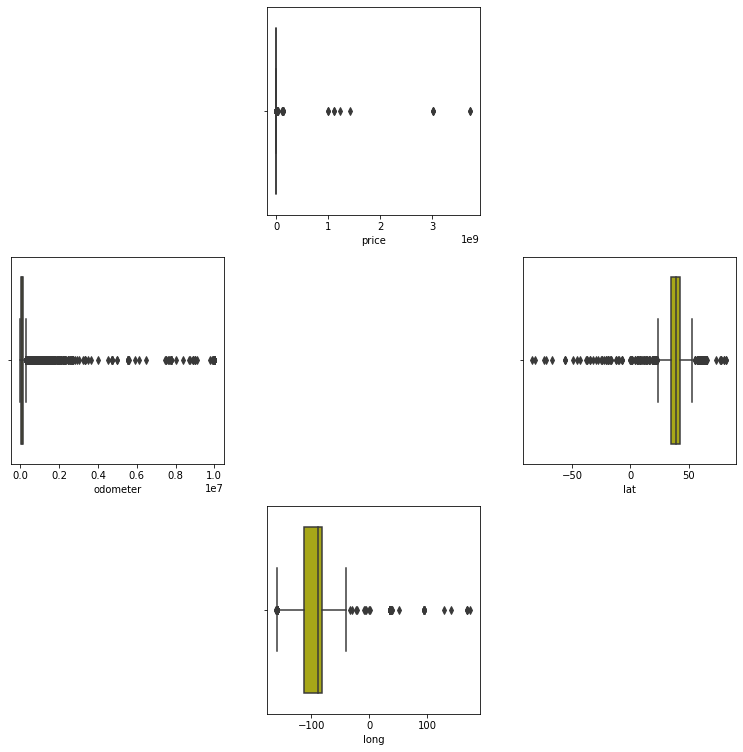

In [32]:
#outlier detection in numerical
fig=plt.figure(figsize=(13,13))
axes=330

#put numerical
for num in numerical:
    axes += 2
    fig.add_subplot(axes)
    #set title of num
    sns.boxplot(data = numerical, x=num, color="y") 
plt.show()

Based on boxplot visualization for numeric feature. thevariable long, lat, and odomater has too many outliers so that we can drop it from the table. the price has so many outlier too..

In [33]:
df['price'].quantile(0.25)

5900.0

In [34]:
df['price'].quantile(0.75)

26485.75

In [35]:
Q1= df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

In [36]:
IQR

20585.75

In [37]:
lower_l = Q1 -1.5 * IQR
upper_l = Q3+ 1.5 * IQR

In [38]:
lower_l

-24978.625

In [39]:
upper_l

57364.375

In [40]:
out_l= (df['price'] < lower_l)

In [41]:
out_u= (df['price'] > upper_l)

In [42]:
len (df['price']) - (len (df['price'] [out_l]) + len (df['price'][out_u]))

418703

In [43]:
df['price'][(out_l| out_u)]

204           58977
280       987654321
346           98900
365           72900
461           99950
            ...    
426694        59900
426716        65950
426778        65995
426810        58995
426840        65999
Name: price, Length: 8177, dtype: int64

In [44]:
df['price'][~(out_l | out_u)]

0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 418703, dtype: int64

In [45]:
df= df[~(out_l | out_u)]
df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


<function matplotlib.pyplot.show(*args, **kw)>

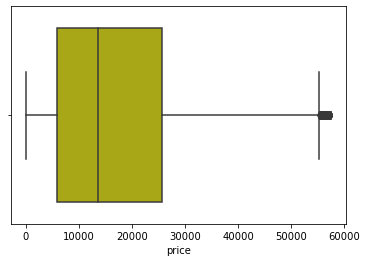

In [46]:
sns.boxplot(x= df['price'], color='y')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

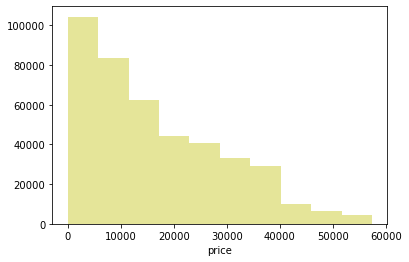

In [47]:
sns.distplot(df['price'], bins=10 ,kde = False, color='y')
plt.show

In [48]:
#drop column long lat and odometer because there is too many outliers.
d_final = df2.drop(columns=['long', 'lat', 'odometer'])
d_final.head()

,manufacturer,cylinders,fuel,title_status,transmission,drive,type,paint_color,condition,year,posting_date,state,description,model,region,region_url,price
0,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,az,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,prescott,https://prescott.craigslist.org,6000
1,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ar,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,fayetteville,https://fayar.craigslist.org,11900
2,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,fl,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,florida keys,https://keys.craigslist.org,21000
3,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,ma,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,worcester / central MA,https://worcester.craigslist.org,1500
4,ford,6 cylinders,gas,clean,automatic,4wd,sedan,white,good,nan,2021-04-23T22:13:05-0400,nc,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,f-150,greensboro,https://greensboro.craigslist.org,4900


**Data Visualization**



Data visualization refers to the techniques used to communicate data or information by encoding it as visual isation objects.



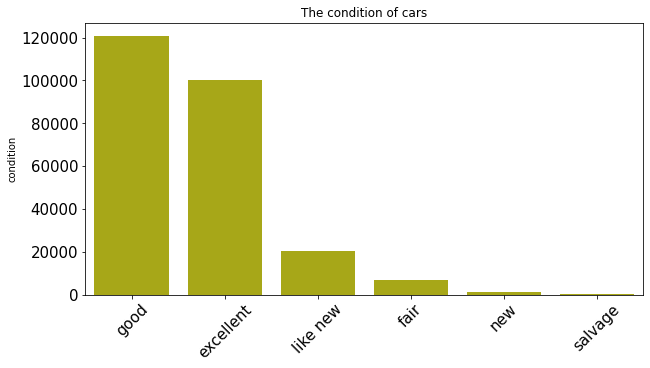

In [49]:
#1 For Category
con=df['condition'].value_counts().head(30)
plt.figure(figsize=(10,5))
sns.barplot(con.index,con, color='y')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);
plt.title('The condition of cars');

Good condition the most condition of cars then excellent which is perfect for used cars conditions.



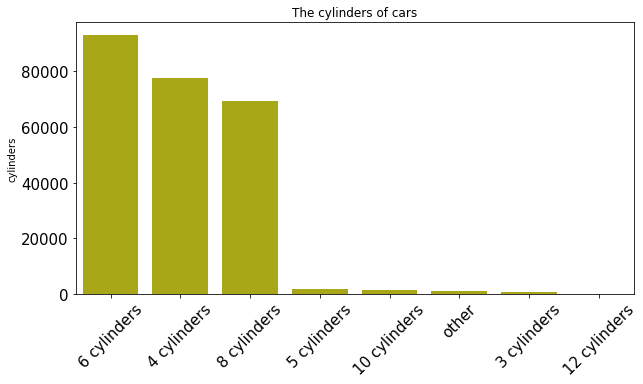

In [50]:
#2

cl=df['cylinders'].value_counts().head(30)
plt.figure(figsize=(10,5))
sns.barplot(cl.index,cl ,color='y')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);
plt.title('The cylinders of cars');

The top cylinders is 6 cylinder, 4 cylinders and 8 cylinder while 12 cylinder not recommended in this case.



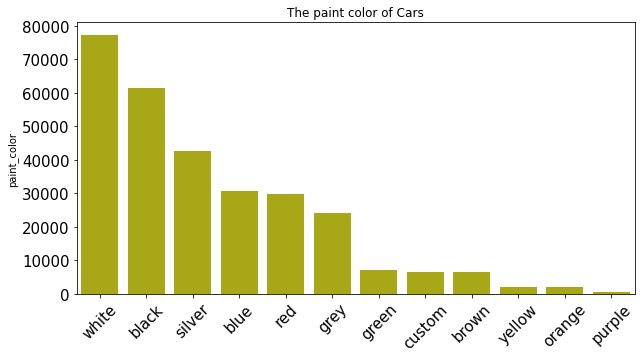

In [51]:
#3

paint=df['paint_color'].value_counts().head(30)
plt.figure(figsize=(10,5))
sns.barplot(paint.index,paint, color='y')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);
plt.title('The paint color of Cars');

The top 3 for paint color of cars is White,Black and Silver.



Questions :
1. The most common manufacturers in dataset based on number of cars.
2. The Highest Price Based on Types of Cars.
3. 3-The most transmission type used based on manufacturer?

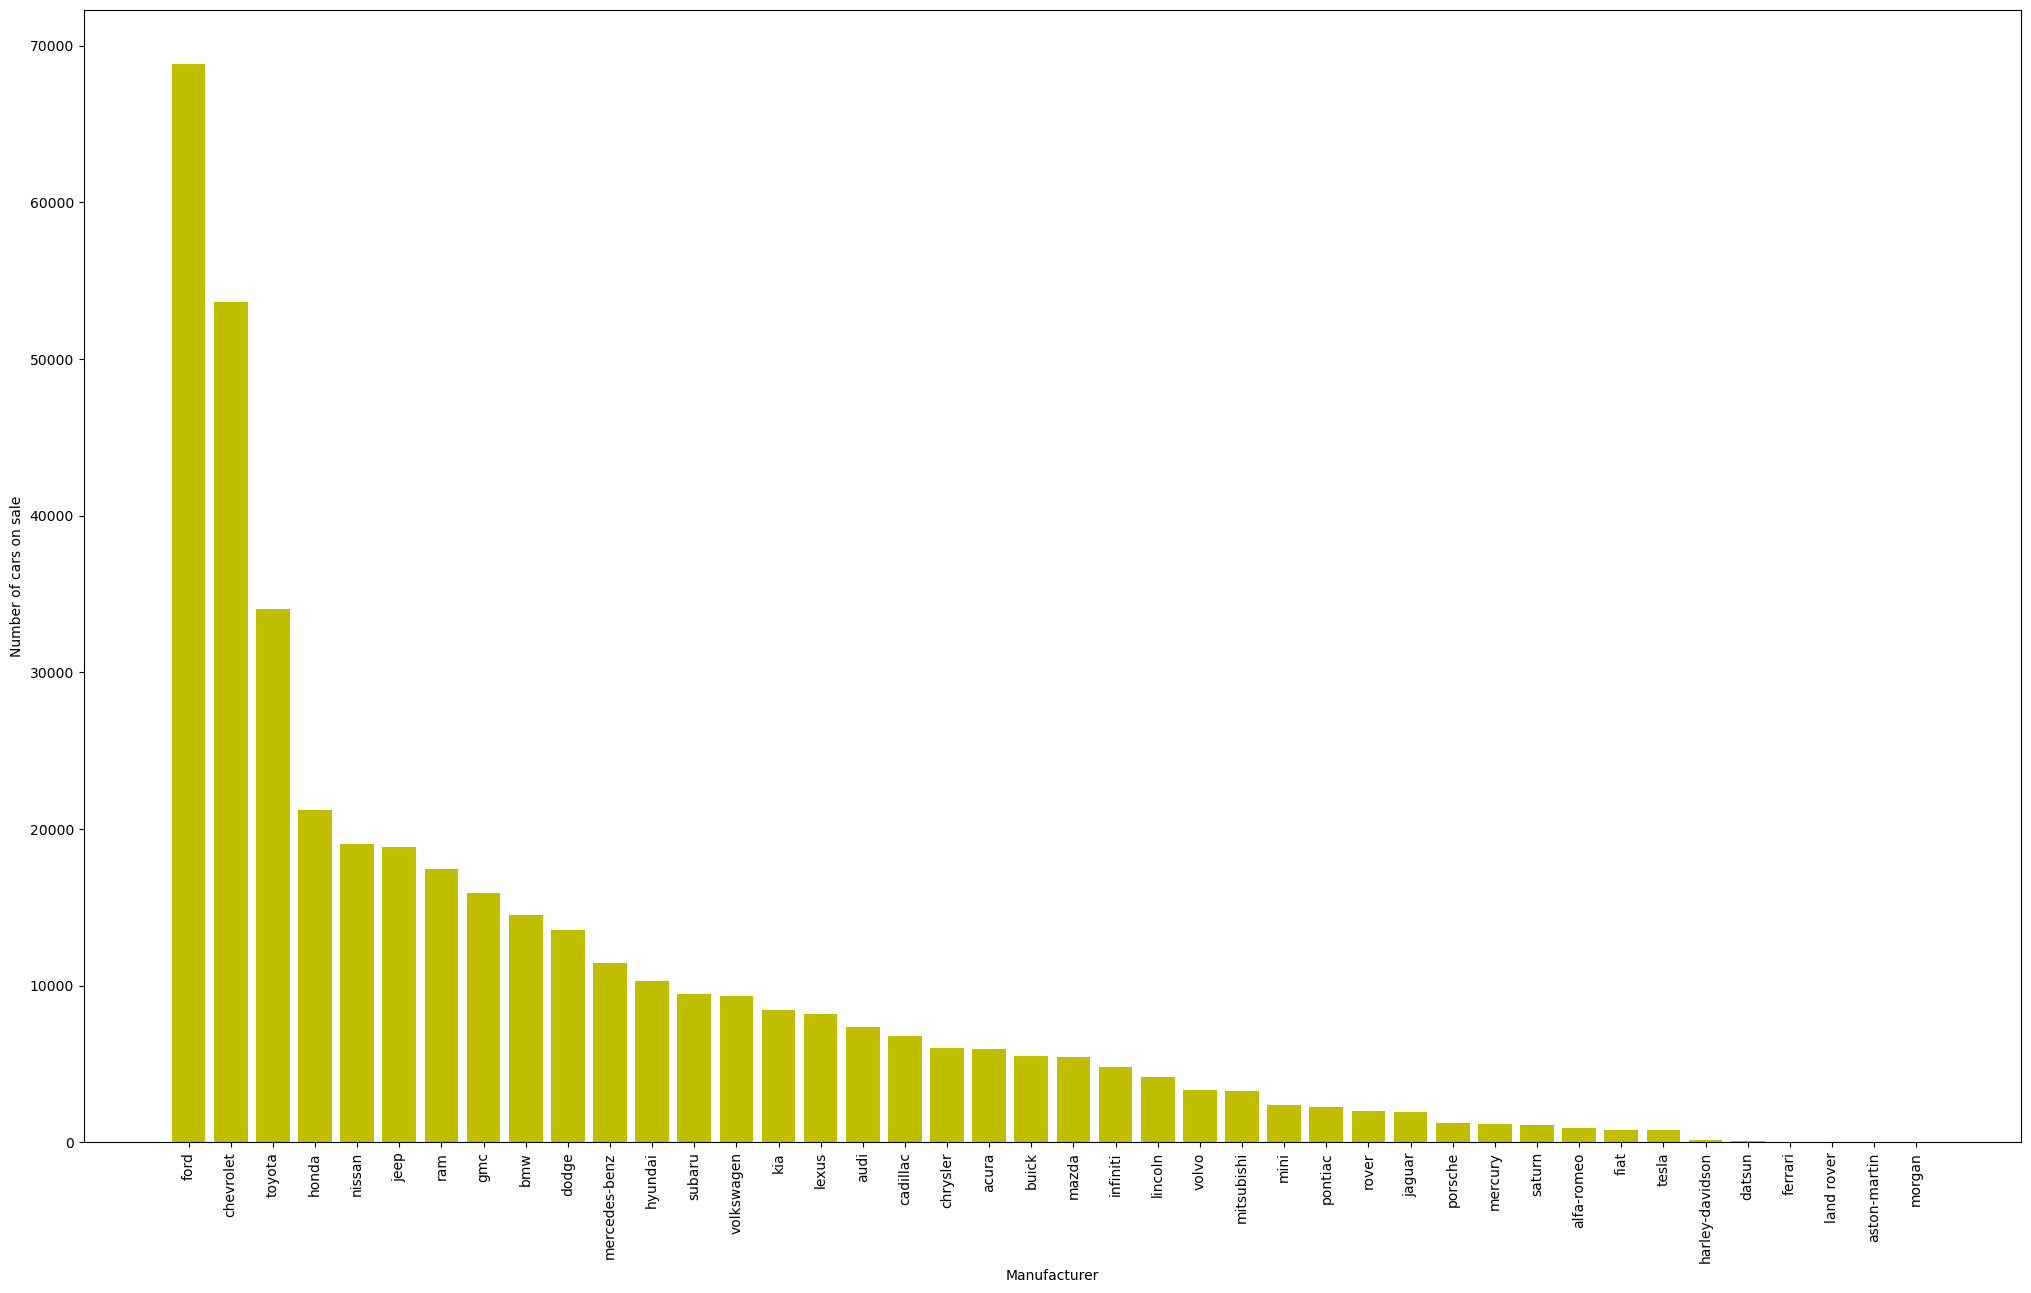

In [52]:
# answe1
manufacturers_counts = df['manufacturer'].value_counts().to_dict()
fig = plt.figure(figsize=(25, 15), dpi= 100, facecolor='w', edgecolor='w')
plt.bar(manufacturers_counts.keys(),manufacturers_counts.values(),color='y')
plt.xticks(rotation = 90);
plt.xlabel('Manufacturer');
plt.ylabel('Number of cars on sale');

The most frequent manufacturers in the top are : (Ford, Chevrolet, toyota, etc.).

In [53]:
# answer 2
joins = df[['manufacturer','type','price']]

join_group =joins.groupby('type').mean().head(5).sort_values('price',ascending=False)


join_group

,price
type,
coupe,19609.527426
convertible,17007.190649
SUV,15498.444540
hatchback,14342.363055
bus,13764.279612


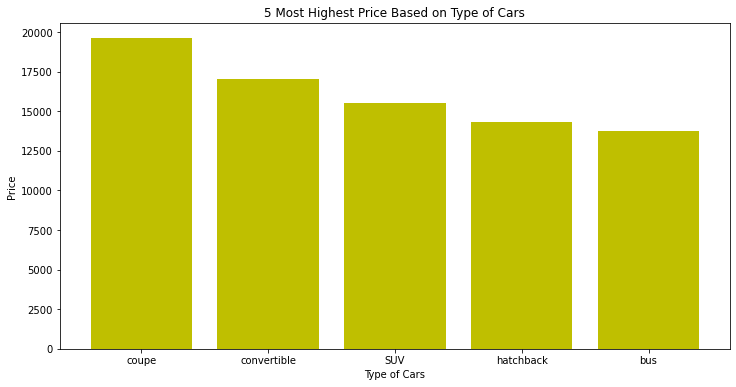

In [54]:
plt.figure(figsize=(12,6))

x=range(5)
plt.bar(x,join_group['price'], color='y')
plt.xticks(x,join_group.index)
plt.xlabel('Type of Cars')
plt.ylabel('Price')
plt.title('5 Most Highest Price Based on Type of Cars')
plt.show()

The Coupe cars the most highest price after that Convertible cars while lowest price for bus type.



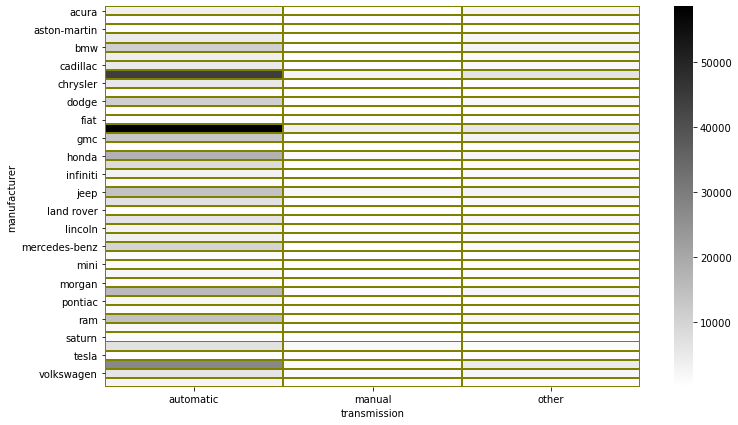

In [55]:
# answer 3

trans_ser = df.groupby('manufacturer').transmission.value_counts()
trans_ser_df = pd.DataFrame(trans_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(trans_ser_df,  cmap='gray_r', linecolor='olive',linewidth=1);

The most Manufacturer used automatic transmission and no surprise in that.



**Price of type of cars for each type of fuel.**

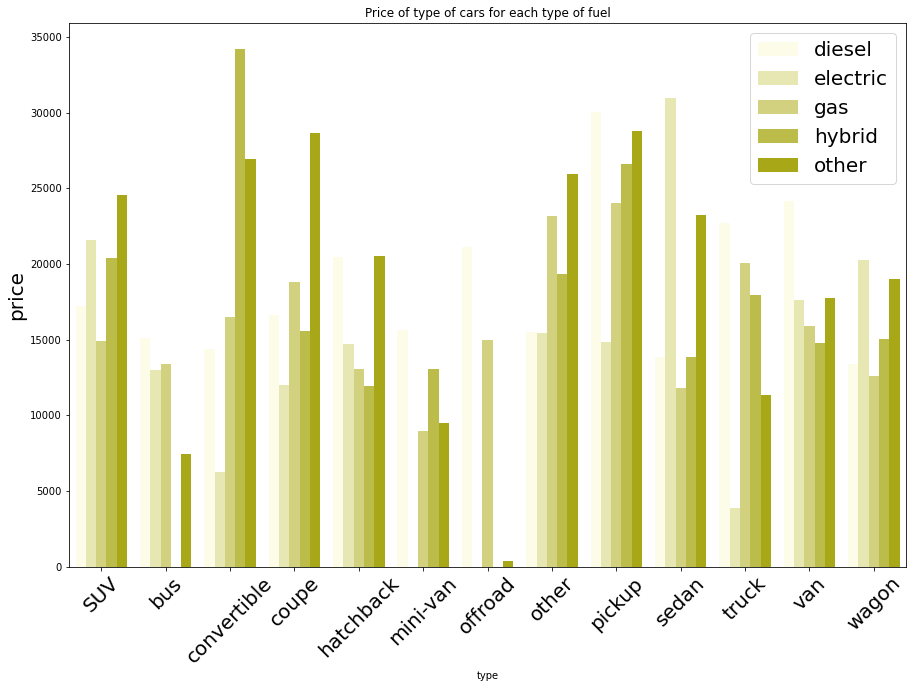

In [56]:
try2=df[['type','fuel','price']][df['price']<=150000].groupby(['type','fuel']).mean()
try2.reset_index(level=0,inplace=True)
try2.reset_index(level=0,inplace=True)
try2=try2.sort_values(['type','fuel'])
plt.figure(figsize=(15,10))
sns.barplot(x='type', y='price', hue='fuel', data=try2, color='y')
plt.xticks(rotation=45,fontsize=20)
plt.ylabel('price',fontsize=20)
plt.legend(fontsize=20)
plt.title('Price of type of cars for each type of fuel');

Cars with different type of fuel and price for each type.



If you want to buy a certain type of used car, chart above could help you to decide your decision So, those are some information we can obtain by doing this EDA.!